In [14]:
import pandas as pd
import numpy as np
import plotly.offline as pyof
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime
from datetime import datetime
from datetime import timedelta
import eikon as ek

import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import combinations
import seaborn as sns
import altair as alt


In [ ]:
ek.set_app_key()



In [27]:
data=pd.read_csv('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/Final_long_etf.csv')
data.date.unique()

array(['2015-12-14', '2015-12-18', '2015-12-23', ..., '2025-01-07',
       '2025-01-08', '2025-01-10'], dtype=object)

In [6]:
data_explanatory = pd.read_csv('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/Final_explanatory_Set.csv')
data_etf = pd.read_csv('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/Final_long_etf.csv')

In [18]:
data_explanatory.head(),data_etf.head()

(         date  US_leading_index  US_coincident_index  US_lagging_index  \
 0  2013-07-15         90.093043            94.386073         89.929227   
 1  2013-07-16         90.091744            94.389422         89.931921   
 2  2013-07-17         90.090525            94.392455         89.934784   
 3  2013-07-18         90.089417            94.395169         89.937829   
 4  2013-07-19         90.088455            94.397560         89.941069   
 
    US_leadind_credit_index  Close_USD_EUR  AVG_PE_SPX  Close_vix  \
 0                -0.767846         0.7655    17.45180      13.79   
 1                -0.758889         0.7597    17.31979      14.42   
 2                -0.750188         0.7618    17.33687      13.78   
 3                -0.741873         0.7627    17.27953      13.77   
 4                -0.734075         0.7609    17.29880      12.54   
 
    Close_treasury  
 0            2.57  
 1            2.55  
 2            2.52  
 3            2.56  
 4            2.50  ,
     

In [8]:
data_etf = data_etf.sort_values(by=['date','tic'])
unique_date=data_etf.date.unique()
unique_date[0],unique_date[-1]

('2015-12-14', '2025-01-10')

In [30]:
data_etf.tic.unique()

array(['emerging_equity', 'fixed_income_balanced', 'min_vol', 'momentum',
       'quality', 'size', 'value'], dtype=object)

In [10]:
# Get Unique dates

data=data.sort_values(by=['date','tic'])
unique_date=data.date.unique()
unique_date[0],unique_date[-1]

NameError: name 'data' is not defined

In [34]:
value_mapping = {
    'emerging_equity': 'Emerging Equity',
    'fixed_income_balanced': 'Fixed Income Balanced',
    'min_vol': 'Minimum Volatility',
    'momentum': 'Momentum',
    'quality': 'Quality',
    'size': 'Size',
    'value': 'Value'
}

data_etf['tic'] = data_etf['tic'].replace(value_mapping)

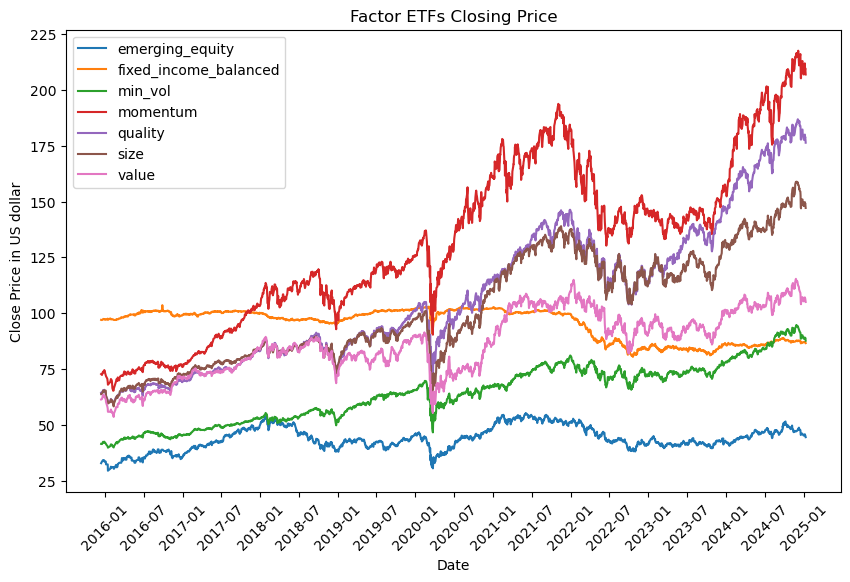

<Figure size 640x480 with 0 Axes>

In [12]:


data_etf['date'] = pd.to_datetime(data_etf['date'])

pivoted_data = data_etf.pivot(index='date', columns='tic', values='close')

plt.figure(figsize=(10,6))
for column in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[column], label=column)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Close Price in US dollar')
plt.title('Factor ETFs Closing Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()
plt.savefig('ETFClosingPrice_2025.png')

In [40]:
data_explanatory

,date,US_leading_index,US_coincident_index,US_lagging_index,US_leadind_credit_index,Close_USD_EUR,AVG_PE_SPX,Close_vix,Close_treasury
0,2013-07-15,90.093043,94.386073,89.929227,-0.767846,0.7655,17.45180,13.79,2.57
1,2013-07-16,90.091744,94.389422,89.931921,-0.758889,0.7597,17.31979,14.42,2.55
2,2013-07-17,90.090525,94.392455,89.934784,-0.750188,0.7618,17.33687,13.78,2.52
3,2013-07-18,90.089417,94.395169,89.937829,-0.741873,0.7627,17.27953,13.77,2.56
4,2013-07-19,90.088455,94.397560,89.941069,-0.734075,0.7609,17.29880,12.54,2.50
...,...,...,...,...,...,...,...,...,...
2862,2024-11-25,99.458232,112.882612,118.429945,-0.520478,0.9528,28.20863,14.60,4.27
2863,2024-11-26,99.446178,112.886059,118.440282,-0.504087,0.9533,28.39243,14.10,4.30
2864,2024-11-27,99.434319,112.889521,118.452404,-0.486927,0.9463,28.28568,14.10,4.25
2865,2024-11-28,99.422665,112.892998,118.466363,-0.468974,0.9472,28.28604,13.90,4.25


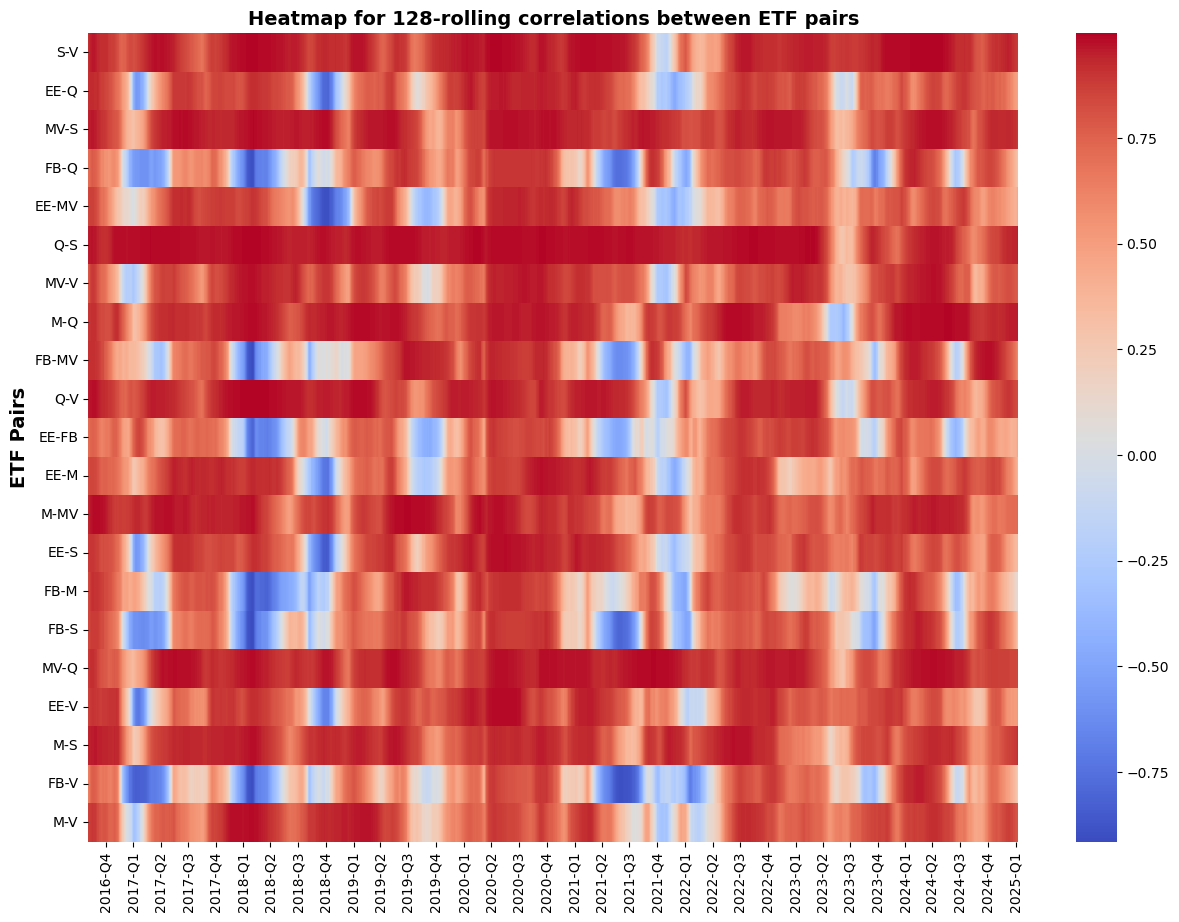

In [95]:
# Correlation map
value_mapping = {
    'Emerging Equity': 'EE',
    'Fixed Income Balanced': 'FB',
    'Minimum Volatility': 'MV',
    'Momentum': 'M',
    'Quality': 'Q',
    'Size': 'S',
    'Value': 'V'
}

data_copy = data_etf.copy()
data_copy['date'] = pd.to_datetime(data_copy['date'])
data_copy.set_index('date', inplace=True)
data_copy['tic'] = data_copy['tic'].replace(value_mapping)
data_copy.index.name=None

unique_tickers = data_copy['tic'].unique()
ticker_pairs = set()
for tic1, tic2 in combinations(unique_tickers, 2):
    ticker_pairs.add(tuple(sorted([tic1, tic2])))

window_size = 128# Lets change 64 and 128 to be consistant with the paper

combined_corr = pd.DataFrame()

for tic1, tic2 in ticker_pairs:
    data_tic1 = data_copy[data_copy['tic'] == tic1]['close']
    data_tic2 = data_copy[data_copy['tic'] == tic2]['close']
    rolling_corr = data_tic1.rolling(window=window_size).corr(data_tic2)
    combined_corr[f'{tic1}-{tic2}'] = rolling_corr
combined_corr = combined_corr.dropna(how='all').T

combined_corr.columns = combined_corr.columns.to_period('Q').strftime('%Y-Q%q')

unique_quarters = combined_corr.columns.unique()

unique_quarters = unique_quarters[1:] # Lets start from the second observation cause of complete labelling issues

quarter_indices = []
seen_quarters = set()
for i, quarter in enumerate(combined_corr.columns):
    if quarter in unique_quarters and quarter not in seen_quarters:
        quarter_indices.append(i)
        seen_quarters.add(quarter)

plt.figure(figsize=(15, len(ticker_pairs) * 0.5))
sns.heatmap(combined_corr, cmap='coolwarm', yticklabels=True)
plt.ylabel('ETF Pairs',fontsize=14, fontweight='bold')

plt.xticks(quarter_indices, unique_quarters, rotation=90)

plt.title(f'Heatmap for {window_size}-rolling correlations between ETF pairs',fontsize=14, fontweight='bold')
plt.savefig('heatmapcorrelationfinal_128.png')

plt.show()


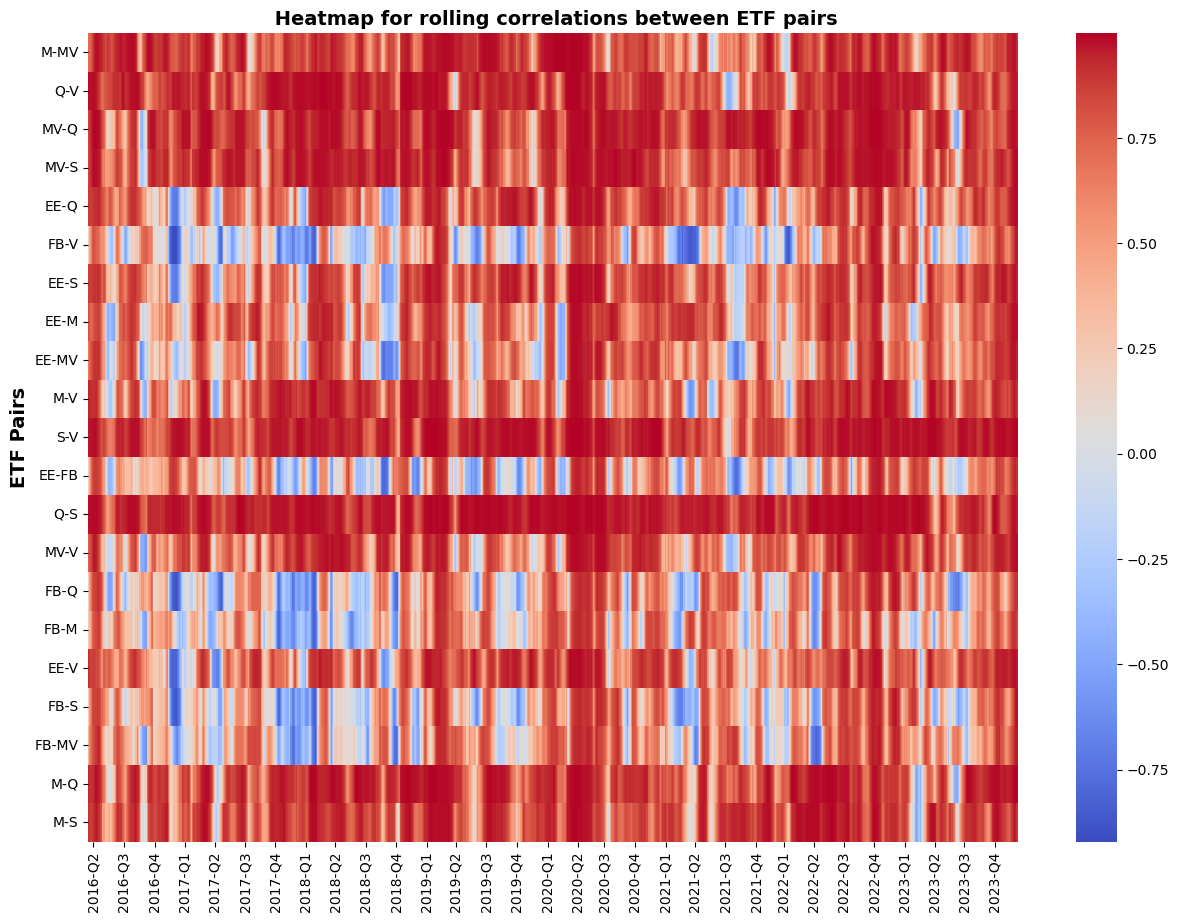

In [13]:
# Correlation map
value_mapping = {
    'Emerging Equity': 'EE',
    'Fixed Income Balanced': 'FB',
    'Minimum Volatility': 'MV',
    'Momentum': 'M',
    'Quality': 'Q',
    'Size': 'S',
    'Value': 'V'
}

data_copy = data.copy()
data_copy['date'] = pd.to_datetime(data_copy['date'])
data_copy.set_index('date', inplace=True)
data_copy['tic'] = data_copy['tic'].replace(value_mapping)
data_copy.index.name=None

unique_tickers = data_copy['tic'].unique()
ticker_pairs = set()
for tic1, tic2 in combinations(unique_tickers, 2):
    ticker_pairs.add(tuple(sorted([tic1, tic2])))

window_size = 30

combined_corr = pd.DataFrame()

for tic1, tic2 in ticker_pairs:
    data_tic1 = data_copy[data_copy['tic'] == tic1]['close']
    data_tic2 = data_copy[data_copy['tic'] == tic2]['close']
    rolling_corr = data_tic1.rolling(window=window_size).corr(data_tic2)
    combined_corr[f'{tic1}-{tic2}'] = rolling_corr
combined_corr = combined_corr.dropna(how='all').T

combined_corr.columns = combined_corr.columns.to_period('Q').strftime('%Y-Q%q')

unique_quarters = combined_corr.columns.unique()

unique_quarters = unique_quarters[1:]

quarter_indices = []
seen_quarters = set()
for i, quarter in enumerate(combined_corr.columns):
    if quarter in unique_quarters and quarter not in seen_quarters:
        quarter_indices.append(i)
        seen_quarters.add(quarter)

plt.figure(figsize=(15, len(ticker_pairs) * 0.5))
sns.heatmap(combined_corr, cmap='coolwarm', yticklabels=True)
plt.ylabel('ETF Pairs',fontsize=14, fontweight='bold')

plt.xticks(quarter_indices, unique_quarters, rotation=90)

plt.title(' Heatmap for rolling correlations between ETF pairs',fontsize=14, fontweight='bold')
plt.savefig('heatmapcorrelationfinal.png')

plt.show()


In [44]:
# 
macro=pd.read_csv('MacroIndicatorData_withindex.csv',index_col=0)
macro.index=macro.index = pd.to_datetime(macro.index)
macro

,US_leading_index,US_coincident_index,US_lagging_index,US_leadind_credit_index
Date,,,,
2012-01-31,87.3,92.3,85.8,-0.679919
2012-02-29,88.0,92.7,85.9,-1.115163
2012-03-31,88.4,92.7,86.1,-1.072192
2012-04-30,88.2,93.0,86.6,-0.519029
2012-05-31,88.4,93.1,86.9,0.362240
...,...,...,...,...
2023-08-31,105.5,111.1,117.8,0.663570
2023-09-30,104.7,111.3,117.8,0.836429
2023-10-31,103.8,111.3,118.2,1.020224


In [45]:
macro = macro.shift(1)
macro=macro.dropna()
macro

,US_leading_index,US_coincident_index,US_lagging_index,US_leadind_credit_index
Date,,,,
2012-02-29,87.3,92.3,85.8,-0.679919
2012-03-31,88.0,92.7,85.9,-1.115163
2012-04-30,88.4,92.7,86.1,-1.072192
2012-05-31,88.2,93.0,86.6,-0.519029
2012-06-30,88.4,93.1,86.9,0.362240
...,...,...,...,...
2023-08-31,105.9,111.0,117.6,0.158594
2023-09-30,105.5,111.1,117.8,0.663570
2023-10-31,104.7,111.3,117.8,0.836429


In [46]:
for column in macro.columns:
    macro[column] = macro[column].astype('float64')

daily_resampled_corrected = macro.resample('D').asfreq()
daily_resampled_corrected


,US_leading_index,US_coincident_index,US_lagging_index,US_leadind_credit_index
Date,,,,
2012-02-29,87.3,92.3,85.8,-0.679919
2012-03-01,NaN,NaN,NaN,NaN
2012-03-02,NaN,NaN,NaN,NaN
2012-03-03,NaN,NaN,NaN,NaN
2012-03-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN


In [47]:
for column in macro.columns:
    daily_resampled_corrected[column] = daily_resampled_corrected[column].interpolate(method='polynomial', order=3)

In [48]:
daily_resampled_corrected

,US_leading_index,US_coincident_index,US_lagging_index,US_leadind_credit_index
Date,,,,
2012-02-29,87.300000,92.300000,85.800000,-0.679919
2012-03-01,87.317992,92.330208,85.805572,-0.703229
2012-03-02,87.336584,92.358909,85.810857,-0.725868
2012-03-03,87.355746,92.386140,85.815870,-0.747841
2012-03-04,87.375447,92.411937,85.820623,-0.769153
...,...,...,...,...
2023-12-27,103.318242,111.592101,118.578148,-0.316628
2023-12-28,103.312100,111.617056,118.584833,-0.419348
2023-12-29,103.306998,111.643336,118.590723,-0.526791


In [35]:
# Get the EPS values for SP500
# https://community.developers.refinitiv.com/questions/49098/historical-index-valuation-ratio-via-eikon-api.html
import time
import random

all_sp500_pe_data_frames = []

# Date range
start_year = 2020
end_year = 2024

for year in range(start_year, end_year + 1):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'

    # Fetch the SP 500 PE Ratio for the specified date range
    yearly_pe_data, e = ek.get_data(['.SPX'], 
                                    ['TR.Index_PE_RTRS.date', 'TR.Index_PE_RTRS'], 
                                    {'SDate': start_date, 'EDate': end_date})

    all_sp500_pe_data_frames.append(yearly_pe_data)
    

    time.sleep(71 + random.randint(0, 18))

In [36]:
final_dataframe_EPS = pd.concat(all_sp500_pe_data_frames, ignore_index=True)
final_dataframe_EPS

,Instrument,Date,Calculated PE Ratio
0,.SPX,2020-01-01T00:00:00Z,23.13078
1,.SPX,2020-01-02T00:00:00Z,23.33067
2,.SPX,2020-01-03T00:00:00Z,23.16533
3,.SPX,2020-01-06T00:00:00Z,23.24783
4,.SPX,2020-01-07T00:00:00Z,23.18
...,...,...,...
1090,.SPX,2024-03-28T00:00:00Z,26.12399
1091,.SPX,2024-03-29T00:00:00Z,26.1112
1092,.SPX,2024-04-01T00:00:00Z,26.0294
1093,.SPX,2024-04-02T00:00:00Z,25.83965


In [78]:
# review a little bit
'''

PESPX=pd.read_csv('PESP500_data20142023.csv')
Breadth=pd.read_csv('Ma50_200_breadth.csv')
USDEUR=pd.read_csv('USDEUR.csv')
GOLD=pd.read_csv('GOLD.csv')
#MacroIndicator=pd.read_csv('MacroIndicatorDailyTransformPoly3.csv')
#MacroIndicator=pd.read_csv('MacroIndicatorDailyffill.csv')
MacroIndicator=pd.read_csv('MacroIndicatorDailyTransformPoly3_shift_ahead.csv')

'''
PESPX=pd.read_csv('PESP500_data20142023.csv')
PESPX

,Instrument,Date,Calculated PE Ratio
0,.SPX,2012-01-02T00:00:00Z,13.83068
1,.SPX,2012-01-03T00:00:00Z,14.02654
2,.SPX,2012-01-04T00:00:00Z,14.05326
3,.SPX,2012-01-05T00:00:00Z,14.09963
4,.SPX,2012-01-06T00:00:00Z,14.06765
...,...,...,...
3092,.SPX,2023-12-06T00:00:00Z,22.91563
3093,.SPX,2023-12-07T00:00:00Z,23.10083
3094,.SPX,2023-12-08T00:00:00Z,23.19225
3095,.SPX,2023-12-11T00:00:00Z,23.27102


In [79]:
PESPX.tail()

,Instrument,Date,Calculated PE Ratio
3092,.SPX,2023-12-06T00:00:00Z,22.91563
3093,.SPX,2023-12-07T00:00:00Z,23.10083
3094,.SPX,2023-12-08T00:00:00Z,23.19225
3095,.SPX,2023-12-11T00:00:00Z,23.27102
3096,.SPX,2023-12-12T00:00:00Z,23.38758


In [80]:
PESPX['Date'] = pd.to_datetime(PESPX['Date'])

# Set 'Date' as the index
PESPX.set_index('Date', inplace=True)

# Generating a full range of business days within the data's time frame
start_date = PESPX.index.min()
end_date = PESPX.index.max()
all_business_days = pd.bdate_range(start=start_date, end=end_date)

# Identifying missing business days
missing_business_days = all_business_days.difference(PESPX.index)
number_missing_days = len(missing_business_days)

number_missing_days

20

In [53]:
missing_business_days

DatetimeIndex(['2013-11-06 00:00:00+00:00', '2014-12-05 00:00:00+00:00',
               '2014-12-08 00:00:00+00:00', '2014-12-09 00:00:00+00:00',
               '2020-05-21 00:00:00+00:00', '2020-05-22 00:00:00+00:00',
               '2020-05-25 00:00:00+00:00', '2020-05-26 00:00:00+00:00',
               '2020-05-27 00:00:00+00:00', '2020-05-28 00:00:00+00:00',
               '2020-05-29 00:00:00+00:00', '2020-06-01 00:00:00+00:00',
               '2020-06-02 00:00:00+00:00', '2021-12-22 00:00:00+00:00',
               '2021-12-23 00:00:00+00:00', '2021-12-24 00:00:00+00:00',
               '2021-12-27 00:00:00+00:00', '2021-12-28 00:00:00+00:00',
               '2021-12-29 00:00:00+00:00', '2021-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [ ]:
MacroIndicatorDailyTransformPoly3

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data: asset returns, market risk premium, size factor, value factor
data = {
    'Asset1': np.random.randn(100),
    'Asset2': np.random.randn(100),
    'Market_Risk_Premium': np.random.randn(100),
    'Size_Factor': np.random.randn(100),
    'Value_Factor': np.random.randn(100)
}

df = pd.DataFrame(data)

# Step 1: Cross-sectional regression for each time period
def cross_sectional_regression(df):
    results = {}
    for col in df.columns[:-3]:  # Exclude factors
        y = df[col]
        X = df[['Market_Risk_Premium', 'Size_Factor', 'Value_Factor']]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results[col] = model.params
    return pd.DataFrame(results).T

coefficients = cross_sectional_regression(df)

# Step 2: Time-series average of coefficients
time_series_average = coefficients.mean()

print("Time-series average of coefficients:")
print(time_series_average)


# Creating activation functions

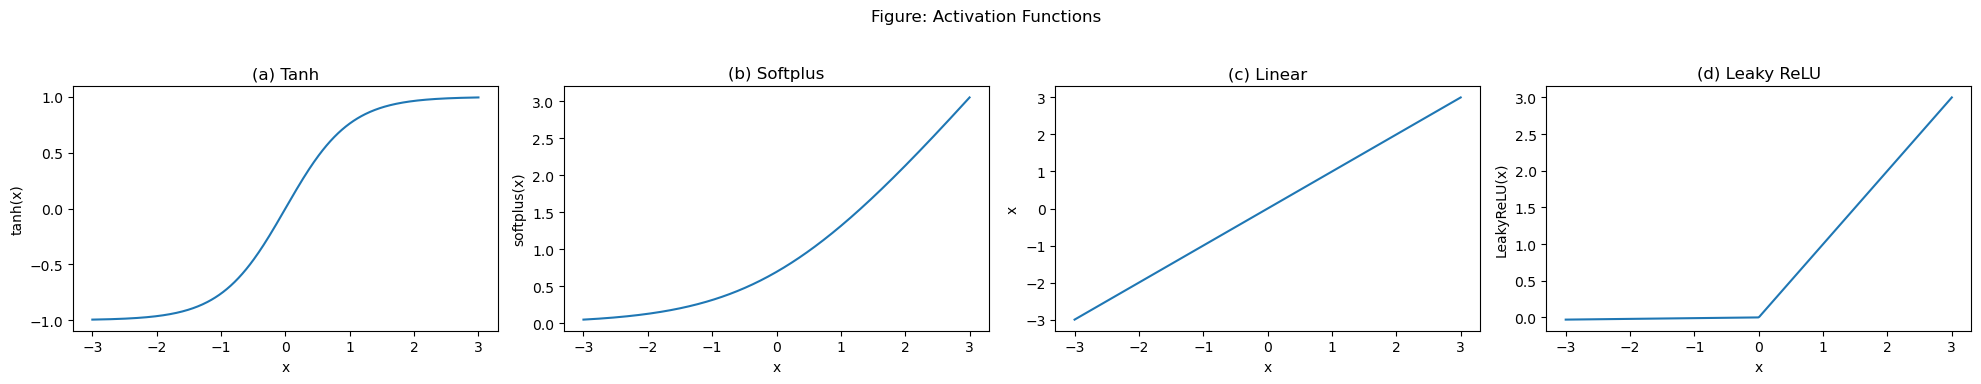

'C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/activation_functions_tanh_softplus_linear_leakyrelu.png'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)
tanh = np.tanh(x)
softplus = np.log1p(np.exp(x)) 
linear = x
leaky_relu = np.where(x > 0, x, 0.01 * x)

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

axs[0].plot(x, tanh)
axs[0].set_title("(a) Tanh")
axs[0].set_xlabel("x")
axs[0].set_ylabel("tanh(x)")

axs[1].plot(x, softplus)
axs[1].set_title("(b) Softplus")
axs[1].set_xlabel("x")
axs[1].set_ylabel("softplus(x)")

# Linear
axs[2].plot(x, linear)
axs[2].set_title("(c) Linear")
axs[2].set_xlabel("x")
axs[2].set_ylabel("x")

# Leaky ReLU
axs[3].plot(x, leaky_relu)
axs[3].set_title("(d) Leaky ReLU")
axs[3].set_xlabel("x")
axs[3].set_ylabel("LeakyReLU(x)")

plt.suptitle("Figure: Activation Functions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

output_path = "C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/activation_functions_tanh_softplus_linear_leakyrelu.png"
plt.savefig(output_path)
plt.show()

output_path


# Daily returns plot

In [52]:
etf_price_data = pd.read_csv('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/Final_long_etf.csv')

In [54]:
etf_price_data = etf_price_data.sort_values(by=['date','close'])
etf_price_data['return']= etf_price_data.groupby('tic')['close'].pct_change()
etf_price_data.dropna(subset='return',inplace=True)

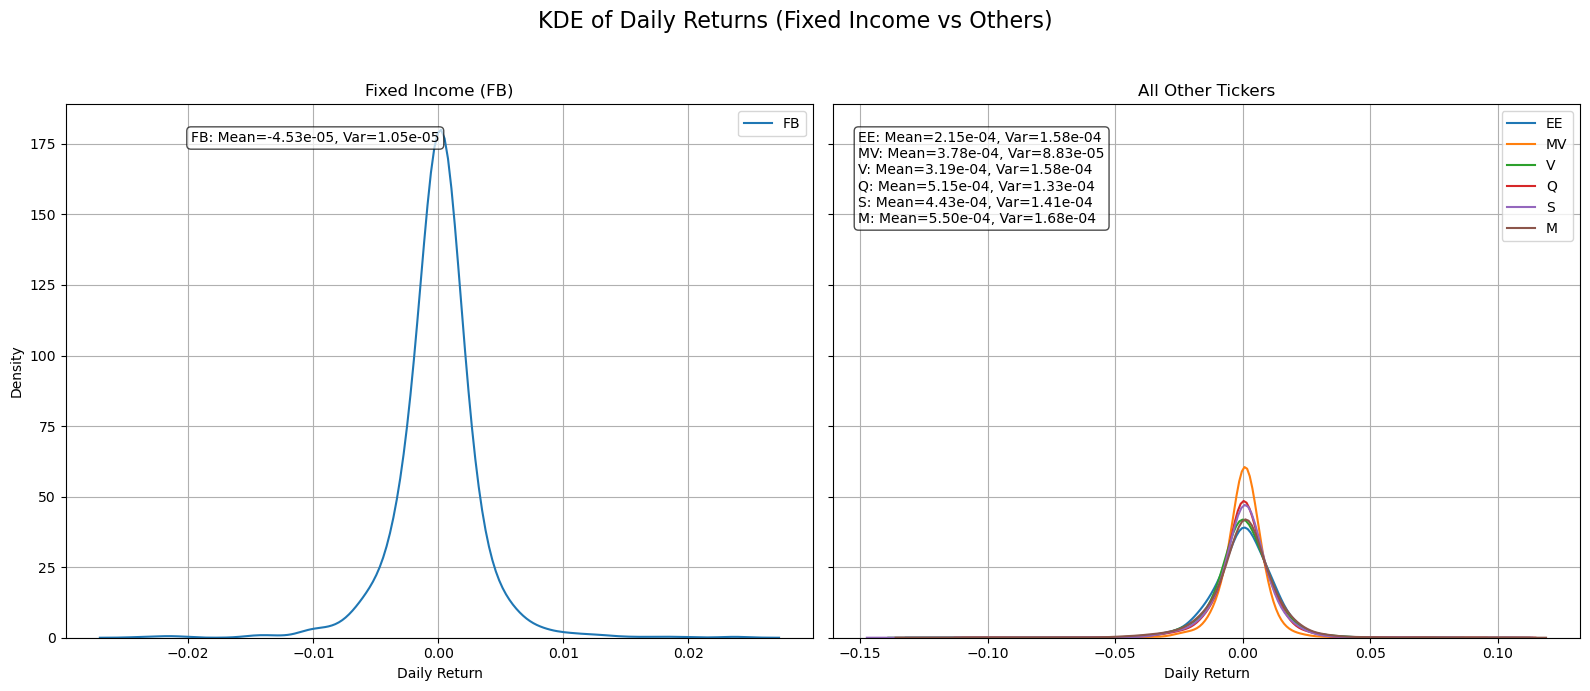

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ticker_name_map = {
    'emerging_equity': 'EE',
    'min_vol': 'MV',
    'momentum': 'M',
    'quality': 'Q',
    'size': 'S',
    'value': 'V',
    'fixed_income_balanced': 'FB'
}

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.suptitle("KDE of Daily Returns (Fixed Income vs Others)", fontsize=16)

stats_fixed = []
stats_others = []

for ticker in etf_price_data['tic'].unique():
    data = etf_price_data[etf_price_data['tic'] == ticker]['return']

    mean = np.mean(data)
    var = np.var(data)
    
    label = ticker_name_map.get(ticker, ticker)
    stat_line = f"{label}: Mean={mean:.2e}, Var={var:.2e}"

    if ticker == "fixed_income_balanced":
        sns.kdeplot(data, ax=axes[0], label=label, bw_adjust=1.5)
        stats_fixed.append(stat_line)
    else:
        sns.kdeplot(data, ax=axes[1], label=label, bw_adjust=1.5)
        stats_others.append(stat_line)

axes[0].set_title("Fixed Income (FB)")
axes[1].set_title("All Other Tickers")

for i, ax in enumerate(axes):
    ax.set_xlabel("Daily Return")
    ax.set_ylabel("Density")
    ax.grid(True)
    ax.legend()
    
    stats_text = "\n".join(stats_fixed if i == 0 else stats_others)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[0] + 0.01, ylim[1]*0.95, stats_text,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("daily_return_etfs_kde.png", dpi=300, bbox_inches='tight')

plt.show()
